In [1]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os

In [6]:
def load_subject_data(index, base_path = "./data/db/derivatives/sub-"):
    base_path+='sub-'
    ind_str = ""
    if index < 10: ind_str = "00"+str(index)
    if index >= 10: ind_str = "0"+str(index)

    path = base_path + ind_str + "/eeg/sub-" + ind_str + "_task-eyesclosed_eeg.set"
    data = loadmat(path)

    return data

In [7]:
info = pd.read_table("C:/Users/Zephyrus/Marija/projekti/AES-SOM-alchajmer/db/participants.tsv", index_col = 'participant_id', delimiter='\t')

output_path = f'./data/participants'
if not os.path.exists(output_path):
    os.mkdir(output_path)

der_path = "C:/Users/Zephyrus/Marija/projekti/AES-SOM-alchajmer/db/derivatives/"

for name in os.listdir(der_path):
    if name.startswith("sub-"):
        curr_idx = int(name[4:])
        curr_data = load_subject_data(curr_idx, der_path)['data']
        curr_idx -= 1 # 0-based indexing for info table
        
        curr_gdr = f"{info['Gender'][curr_idx]}"
        curr_age = f"{info['Age'][curr_idx]}"
        curr_group = f"{info['Group'][curr_idx]}"
        curr_mmse = f"{info['MMSE'][curr_idx]}"

        curr_name = f"sub-{curr_idx}-{curr_gdr}-{curr_age}-{curr_group}-{curr_mmse}.pickle"
 
        with open(os.path.join(output_path, curr_name), 'wb') as f:
            pickle.dump(curr_data, f)

        

In [22]:
x = load_subject_data(1)['data']

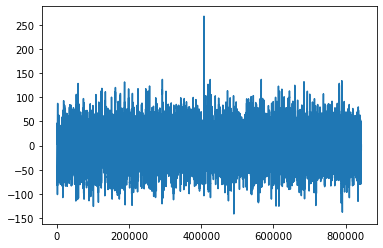

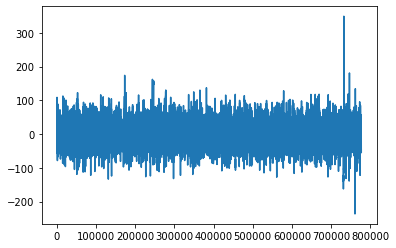

In [9]:
def plot_sub_data(data, window):
    one_chanel = data['data'][1]
    times = data['times'].T

    plt.plot(times, one_chanel)
    plt.show()

window = [5000, 10000]
data = load_subject_data(17)
plot_sub_data(data, window)
data = load_subject_data(37)
plot_sub_data(data, window)

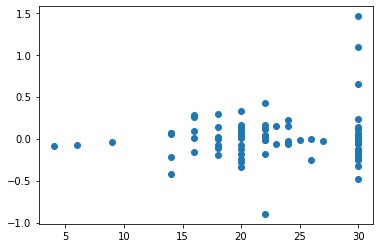

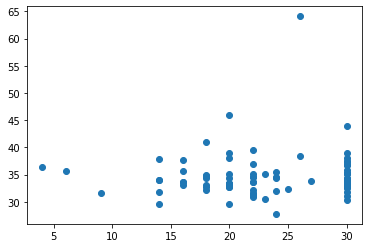

In [11]:
mmse = pd.read_csv('./data/db/participants.tsv', sep='\t')

subject_list = mmse['participant_id']
means = np.zeros((len(subject_list), 1))
stds = np.zeros((len(subject_list), 1))

mmse_score = mmse['MMSE']

for sub in subject_list:
    sub_int = int(sub[4:])
    data = load_subject_data(sub_int)
    eeg = data['data'][0]

    means[sub_int-1] = np.mean(eeg)
    stds[sub_int-1] = np.std(eeg)

plt.scatter(mmse_score, means)
plt.show()
plt.scatter(mmse_score, stds)
plt.show()

In [6]:
usefull_keys = ['data', 'times', 'group']

def create_dict_subject(index, usefull_keys):
    usefull_data_dict = {}
    data = load_subject_data(index)

    for key in usefull_keys:
        if key == 'data':
            for i in range(data[key].shape[0]):
                usefull_data_dict['ch' + str(i)] = [data[key][i].T]
        elif key == 'times':
            usefull_data_dict[key] = [np.squeeze(data[key])]
        elif key == 'group':
            usefull_data_dict[key] = data[key][0]
        else:
            usefull_data_dict[key] = [data[key]]

    mmse = pd.read_csv('..\dataset\participants.tsv', sep='\t')
    mmse_score = mmse['MMSE']

    usefull_data_dict['MMSE'] = mmse_score[index-1]

    return usefull_data_dict

In [7]:
n_subjects = len(subject_list)

def save_data(path):
    df = pd.DataFrame(columns = ['ch'+str(i) for i in range(19)] + ['times','group','MMSE'])
    for i in range(n_subjects):
        subject_data_dict = create_dict_subject(i+1, usefull_keys)
        df = df.append(subject_data_dict, ignore_index=True)
    print(df.head())
    df.to_csv(path)
    
# save_data("..\\all_subjects.csv")

In [ ]:
def create_data_matrix(index):
    data = load_subject_data(index)